## Election Data Project - Polls and Donors  

#### В этом проекте мы исследуем данные выборов 2012 года в США. И проанализируем два набора данных.  

Первым набором данных станут результаты политических опросов: мы проанализируем агрегированные данные опроса и ответим на несколько вопросов:

- Кого опрашивали и какова была их партийная принадлежность?
- В пользу Ромни или Обамы по результатам опроса?
- Как неопределившиеся избиратели влияют на опрос?
- Можем ли мы учесть не определившихся избирателей?
- Как изменились настроения избирателей со временем?
- Можем ли мы увидеть эффект от дебатов в опросах?  

Второй набор данных содержит информацию о совершивших пожертвования на изюирательную компанию. При рассмотрении этого набора данных мы попытаемся ответить на следующие вопросы:  

- Сколько было пожертвовано и какое было среднее пожертвование?
- Чем различались пожертвования кандидатов?
- Чем различались пожертвования демократов и республиканцев?
- Какова была демография доноров?
- Есть ли схема для сумм пожертвований?

In [ ]:
#импортируем необходимые библиотеки
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from pandas_datareader import data

from datetime import datetime
import os
import pandas_datareader as pdr
import pandas_datareader.data as web

import requests

In [4]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [5]:
from io import StringIO

In [6]:
#используем requests для получения информации в текстовом виде

url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source) 

In [7]:
# теперь преобразуем данные в DataFrame
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


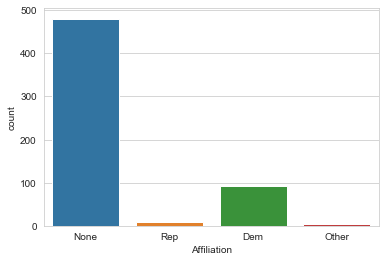

In [9]:
# посмотрим быструю визуаилизацию результатов овпросов
sns.countplot('Affiliation',data=poll_df)

Похоже, избиратели в целом относительно нейтральны, но все же склоняются к демократической принадлежности, было бы хорошо иметь это в виду при дальнейшем исследовании. Посмотрим, дает ли сортировка по населению дальнейшее понимание данных.

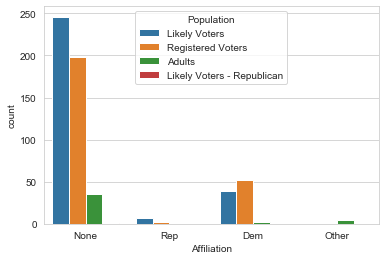

In [10]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

У нас есть хорошие данные о вероятных избирателях и зарегистрированных избирателях, поэтому мы надеемся, что данные опроса должны хорошо отражать опрошенное население. Еще раз кратко посмотрим на данные.

In [11]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Посмотрим на средние показатели Обамы, Ромни и опрошенных, которые так и не определились.

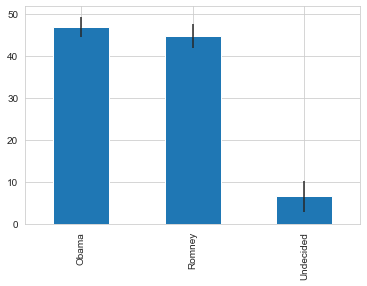

In [12]:
avg = pd.DataFrame(poll_df.mean()) 
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Other',axis=0,inplace=True)
avg.drop('Question Text',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)

std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Other',axis=0,inplace=True)
std.drop('Question Text',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

Интересно посмотреть, насколько близки эти опросы, особенно с учетом фактора неопределенности. Посмотрим на цифры.

In [13]:
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','STD']

poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


Похоже, опросы показывают, что это довольно близкая гонка, но как насчет нерешительных избирателей? Большинство из них, скорее всего, проголосуют за одного из кандидатов после выборов. Если мы предположим, что мы разделим неопределившихся поровну между двумя кандидатами, наблюдаемая разница должна быть объективной оценкой окончательной разницы.

In [14]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Если бы мы захотели, мы также могли бы провести быстрый анализ временных рядов настроений избирателей, построив график предпочтений Обамы / Ромни по сравнению с датами окончания опроса. 

Примечание: время указано в обратном хронологическом порядке. Также будем помнить о нескольких опросах на дату окончания.

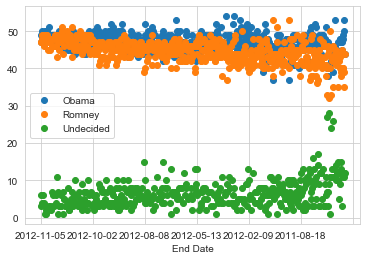

In [15]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

Продолжим и наметим разницу между Обамой и Ромни и то, как она меняется с течением времени.

In [16]:
from datetime import datetime

In [17]:
# создадим новый столбец для разницы между двумя кандидатами
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Столбец «Difference» - это Обама минус Ромни, поэтому положительная разница указывает на предпочтение Обаме в опросах.

Продолжим и посмотрим, сможем ли мы представить себе, как это отношение к различиям меняется со временем. Мы начнем с использования groupby, чтобы сгруппировать опросы по их начальным данным, а затем отсортировать их по этой дате начала.

In [18]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


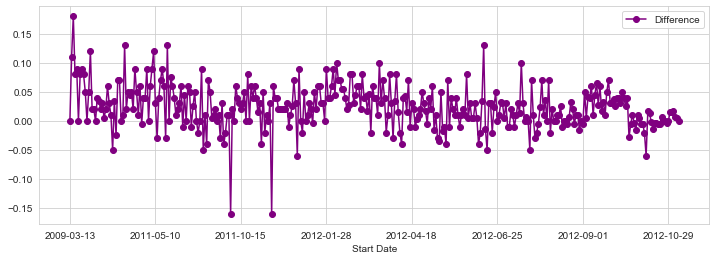

In [19]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

Нанесем маркерные линии на даты дебатов и посмотрим, есть ли какое-либо общее представление о результатах опроса.

Даты дебатов были 3 октября, 11 октября и 22 октября. Добавим несколько линий в качестве маркеров, а затем увеличим масштаб октября.

Чтобы найти, где установить предел x для фигуры, нам нужно узнать, где находится индекс за октябрь 2012 года.

In [20]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


Теперь мы знаем, где установить лимит x на октябрь на нашей диограмме.

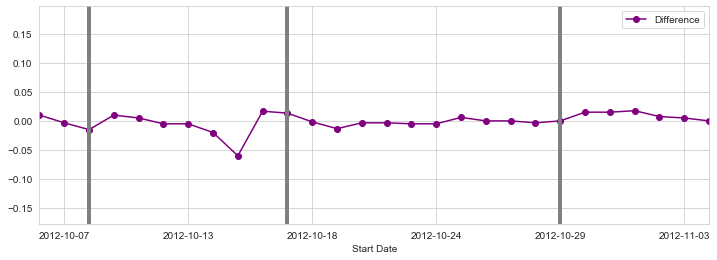

In [21]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')

Удивительно, но эти опросы отражают падение рейтинга Обамы после вторых дебатов против Ромни, хотя, насколько известно, он выступил против Ромни намного хуже во время первых дебатов.

Для всех этих опросов важно помнить, как географическое положение может повлиять на ценность опроса при прогнозировании результатов национальных выборов.

#### А теперь посмотрим на набор данных, состоящий из информации о пожертвованиях на федеральную кампанию.

При рассмотрении этого набора данных мы попытаемся ответить на следующие вопросы:

1. Сколько было пожертвовано и какое было среднее пожертвование?
2. Чем различались пожертвования кандидатов?
3. Чем различались пожертвования демократов и республиканцев?
4. Какова была демография жертвователей?
5. Есть ли схема для сумм пожертвований?

In [23]:
# теперь прочитаем данные из файла и преобразуем в DataFrame
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\datur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [25]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


Посмотрим суммы пожертвований и среднюю сумму пожертвований.

In [26]:
donor_df['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

8079 разных сумм. Это довольно много. Посмотрим на среднее значение и стандартное отклонение.

In [27]:
# Найдем среднюю сумму пожертвований
don_mean = donor_df['contb_receipt_amt'].mean()

# Нйдем стандартное отклонение пожертвований
don_std = donor_df['contb_receipt_amt'].std()

print('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


Среднее пожертвование составило 298.24 со стандартным отклонением равным 3749.67

Это огромное стандартное отклонение! Посмотрим, есть ли какие-либо крупные пожертвования или другие факторы, мешающие распределению пожертвований.

In [30]:
#создадим Series из DataFrame
top_donor = donor_df['contb_receipt_amt'].copy()

#отсортируем
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Есть отрицательные значения, а также огромные суммы пожертвований. Отрицательные значения связаны с тем, что FEC регистрирует возврат средств, а также пожертвования, посмотрим только на положительные суммы взносов.

In [32]:
top_donor = top_donor[top_donor >0]
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Здесь мы видим, что 10 самых распространенных пожертвований варьируются от 10 до 2500 долларов.

Быстрый вопрос, который мы могли бы проверить - круглые ли суммы пожертвований? (например, 10, 20, 50, 100, 500 и т. д.) 
Мы можем быстро визуализировать это, построив гистограмму и проверив пики на этих значениях. Продолжим и сделаем это для самых распространенных сумм, до 2500 долларов.

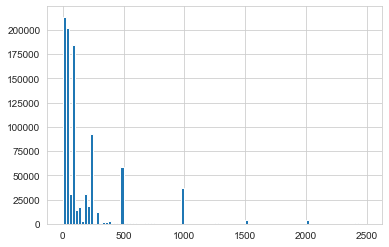

In [33]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

Похоже, наша догадка была правильной, поскольку мы набираем круглые числа.

Углубимся в данные и посмотрим, сможем ли мы разделить пожертвования по партиям, для этого нам нужно найти способ создания нового столбца «Party». Мы можем сделать это, начав с кандидатов и их принадлежности. Составим список кандидатов.

In [34]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Продолжим и отделим Обаму от кандидатов республиканцев, добавив столбец «Party Affiliation». Мы можем сделать это, используя карту в словаре партийной принадлежности.

In [35]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

Посмотрим на наш DataFrame, а также убедимся, что мы очищаем возврат от сумм взносов.

In [36]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Начнем с агрегирования данных по кандидатам. Мы быстро посмотрим на общую сумму, полученную каждым кандидатом. Сначала мы посмотрим на общее количество пожертвований, а затем на общую сумму.

In [37]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Очевидно, что Обама является лидером по количеству пожертвователей, что имеет смысл, поскольку он не конкурирует ни с какими другими кандидатами от демократов. Посмотрим на общую сумму в долларах.

In [38]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

Это не очень удобно для чтения, и важным аспектом науки о данных является четкое представление информации. Продолжим и просто отобразим эти значения в чистом цикле for.

In [40]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print(" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




В таком виде сложно провести быстрое сравнение, просто прочитав эту информацию. Представим ее в виде графика.

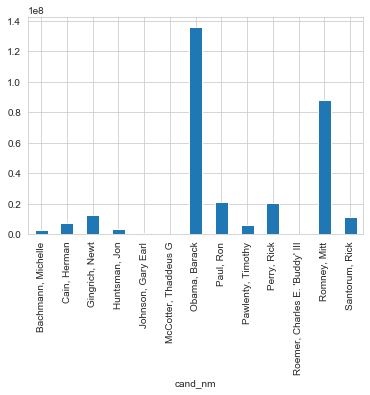

In [42]:
cand_amount.plot(kind='bar')

Как мы видели ранее, очевидно, что Обама является лидером по суммам пожертвований, что имеет смысл, поскольку он не конкурирует ни с какими другими демократическими кандидатами. Сравним пожертвования демократов и республиканцев.

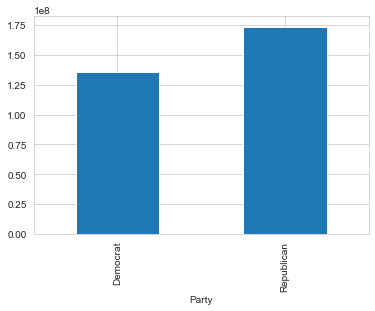

In [43]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Похоже, Обама не мог конкурировать со всеми республиканцами, но у него, безусловно, есть то преимущество, что их финансирование распределяется между несколькими кандидатами.

Посмотрим на пожертвования и от кого они поступили (что касается рода занятий).

In [44]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [45]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


Теперь посмотрим на сколько большой наш DataFrame.

In [46]:
occupation_df.shape

(45067, 2)

Это, вероятно, не слишком велико для эффективного отображения с помощью небольшой статической визуализации. Что нам следует сделать, так это установить ограничение на общую сумму взносов. В конце концов, небольшие пожертвования в размере 20 долларов на один вид деятельности не дадут нам слишком хорошего понимания. Установим отсечку в 1 миллион долларов.

In [47]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [48]:
occupation_df.shape

(31, 2)

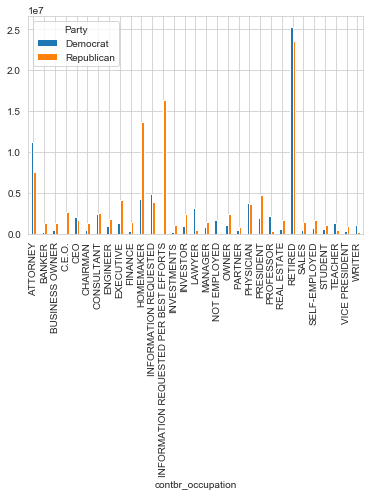

In [49]:
occupation_df.plot(kind='bar')

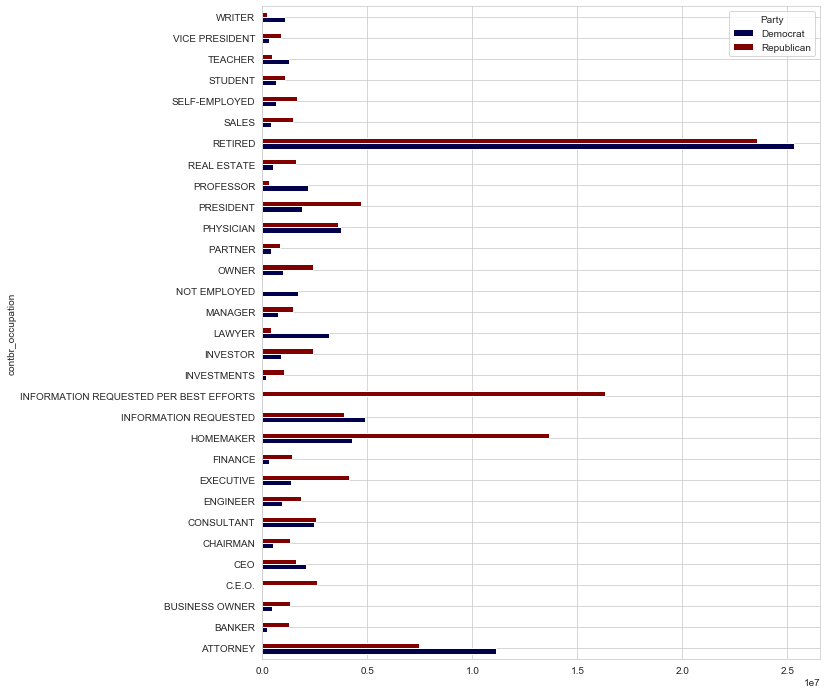

In [50]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Похоже, есть профессии, которые либо неправильно обозначены, либо не являются профессиями. Избавимся от: Information Requested occupations и объединим CEO и C.E.O.

In [51]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [52]:
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.',inplace=True)

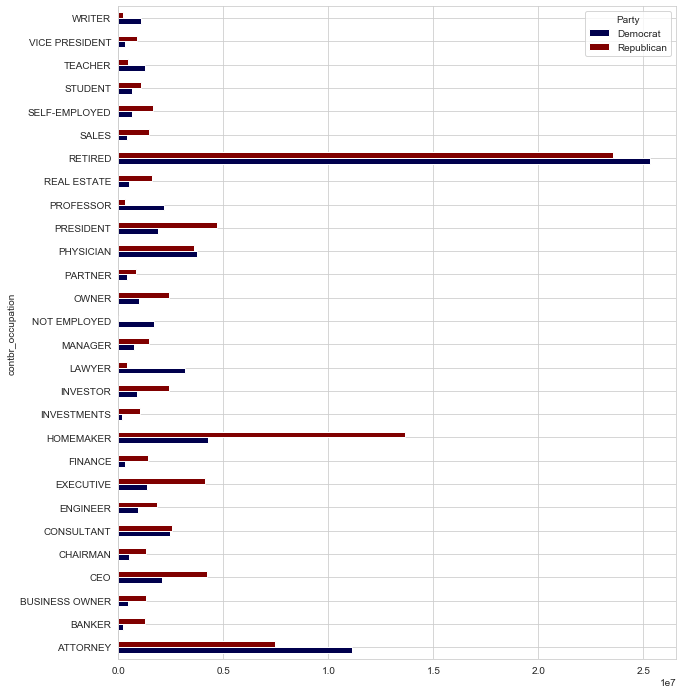

In [53]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Похоже, что руководители компаний придерживаются более консервативного подхода, это может быть связано с налоговой политикой каждой партии во время выборов.